First let's do some preprocessing before prediction.
Data Preprocessing is a vital factor in creating an accurate model. 

In [1]:
#Import the necessary libraries
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:

data = pd.read_csv("diabetes_risk_prediction_dataset.csv")
data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
#Capitalize first letter of the column header
data = data.rename(columns={"delayed healing":"Delayed Healing", 'visual blurring':"Visual Blurring", 'Sudden weight Loss':'Sudden Weight Loss', 'weakness':"Weakness", 'partial paresis':"Partial Paresis", "class":"Class", 'muscle stiffness':'Muscle Stiffness'})


In [4]:
#Let's map the strings into integer

#Copy the data
diabetic = data.copy()



In [5]:


#Map colums
diabetic['Class'] = diabetic['Class'].map({'Positive': 1, 'Negative':0})
diabetic['Gender'] = diabetic['Gender'].map({'Male': 1, 'Female':0})

#Map symptoms
mapping = {'Yes':1, 'No':0}
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss',
       'Weakness', 'Polyphagia', 'Genital thrush', 'Visual Blurring',
       'Itching', 'Irritability', 'Delayed Healing', 'Partial Paresis',
       'Muscle Stiffness', 'Alopecia', 'Obesity']
for symptom in symptoms:
    diabetic[symptom] = diabetic[symptom].map(mapping)

#Resccale the Age 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
diabetic["Age"] = scaler.fit_transform(diabetic[["Age"]])

diabetic




,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.743741,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,-0.002376,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.821362,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,-1.320358,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [6]:
#define the input and target variables
Input_data = diabetic.iloc[:,:-1]

Target_data = diabetic.iloc[:,-1]


In [7]:
Input_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity
0,-0.661367,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,0.821362,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,-0.578993,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,-0.249498,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,0.986110,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.743741,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,-0.002376,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,0.821362,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,-1.320358,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [8]:
Target_data

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: Class, Length: 520, dtype: int64

In [9]:
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
#Import relevant libraries
import sklearn
from sklearn.model_selection import train_test_split

#Use 80% of the data for training and 20 for testing
input_train, input_test, target_train, target_test = train_test_split(Input_data, Target_data, test_size=0.20, random_state=42)

In [11]:
#Let's check the shapes
print("input_train_shape:",input_train.shape)
print("input_test_shape:",input_test.shape)
print("target_test_shape:",target_test.shape)
print("target_train_shape:", target_train.shape)


input_train_shape: (416, 16)
input_test_shape: (104, 16)
target_test_shape: (104,)
target_train_shape: (416,)


## Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression model
log_model = LogisticRegression()
log_model.fit(input_train, target_train)

# Make predictions on the test set
target_pred = log_model.predict(input_test)

Accuracy:
 0.9230769230769231
class_report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



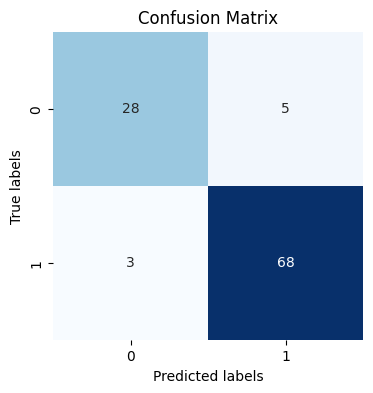

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
accuracy = print("Accuracy:\n", accuracy_score(target_test, target_pred))
class_report = print("class_report:\n",classification_report(target_test, target_pred))
#confusion_matri = print("conf_matrix:\n",confusion_matrix(target_test, target_pred))


# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Decision Tree Classifier

Accuracy:
 0.9615384615384616
Class_report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.94      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



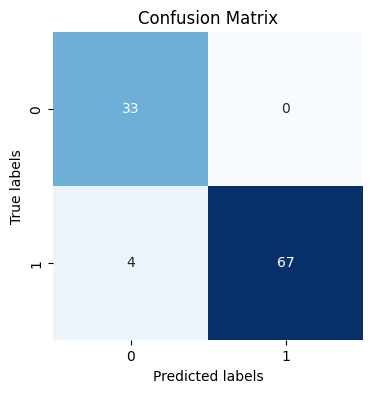

In [14]:
from sklearn.tree import DecisionTreeClassifier

#Train the decision tree classifier

dtc_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2)

dtc_model.fit(input_train, target_train)

# Make predictions on the test set
target_pred_dtc = dtc_model.predict(input_test)

#check the accuracy, report and confusion matrix
accuracy_dtc =  accuracy_score(target_test, target_pred_dtc)
print("Accuracy:\n",accuracy_dtc)
class_report_dtc = classification_report(target_test, target_pred_dtc)
print("Class_report:\n",class_report_dtc)

# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred_dtc)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## KNeighbors Classifier

Accuracy:
 0.9038461538461539
Class_report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.96      0.90      0.93        71

    accuracy                           0.90       104
   macro avg       0.88      0.91      0.89       104
weighted avg       0.91      0.90      0.91       104



C:\Users\chiez\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chiez\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


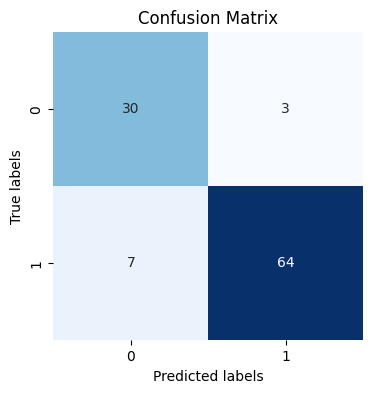

In [15]:
from sklearn.neighbors import KNeighborsClassifier

#Train the Kneighbors classifier

knc_model = KNeighborsClassifier(n_neighbors = 5)

knc_model.fit(input_train, target_train)

# Make predictions on the test set
target_pred_knc = knc_model.predict(input_test)

#check the accuracy, report and confusion matrix
accuracy_knc =  accuracy_score(target_test, target_pred_knc)
print("Accuracy:\n",accuracy_knc)
class_report_knc = classification_report(target_test, target_pred_knc)
print("Class_report:\n",class_report_knc)


# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred_knc)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Support Vector Machine (SVM)

Accuracy:
 0.9711538461538461
Class_report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.97      0.99      0.98        71

    accuracy                           0.97       104
   macro avg       0.97      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104



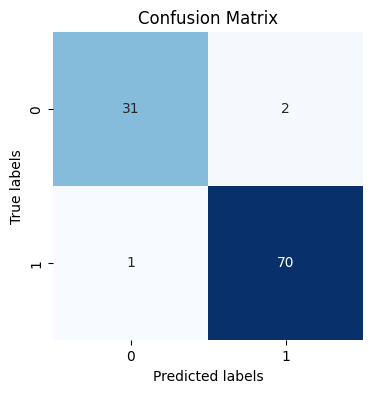

In [16]:
from sklearn.svm import SVC

#Train the SVM classifier

# Let's set the kernel as rbf..we also have 'poly', 'linear', etc.
svm_model = SVC(kernel='rbf')  


svm_model.fit(input_train, target_train)

# Make predictions on the test set
target_pred_svm = svm_model.predict(input_test)

#check the accuracy, report and confusion matrix
accuracy_svm =  accuracy_score(target_test, target_pred_svm)
print("Accuracy:\n",accuracy_svm)
class_report_svm = classification_report(target_test, target_pred_svm)
print("Class_report:\n",class_report_svm)

# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Random Forest Classifier

Accuracy:
 0.9903846153846154
Class_report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



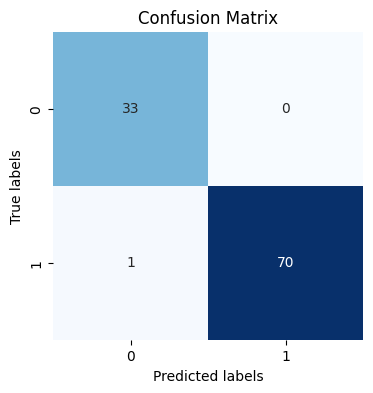

In [17]:
from sklearn.ensemble import RandomForestClassifier

#Train the Random Forest classifier

#Let number of trees be 100
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42) 


rfc_model.fit(input_train, target_train)

# Make predictions on the test set
target_pred_rfc = rfc_model.predict(input_test)

#check the accuracy, report and confusion matrix
accuracy_rfc =  accuracy_score(target_test, target_pred_rfc)
print("Accuracy:\n",accuracy_rfc)
class_report_rfc = classification_report(target_test, target_pred_rfc)
print("Class_report:\n",class_report_rfc)

# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred_rfc)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## AdaBoost Classifier

Accuracy:
 0.9423076923076923
Class_report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.95      0.97      0.96        71

    accuracy                           0.94       104
   macro avg       0.94      0.93      0.93       104
weighted avg       0.94      0.94      0.94       104



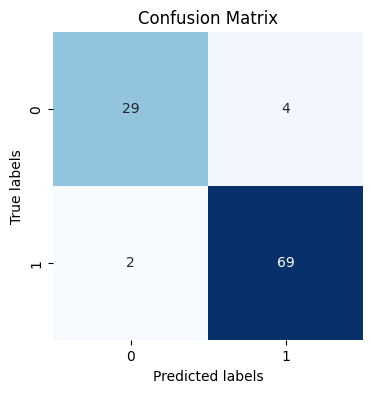

In [18]:

from sklearn.ensemble import  AdaBoostClassifier

#Train the Ada Boost classifier

#Let number of weak learners be 50
adc_model = AdaBoostClassifier(n_estimators=50, algorithm='SAMME',  random_state=42) 


adc_model.fit(input_train, target_train)

# Make predictions on the test set
target_pred_adc = adc_model.predict(input_test)

#check the accuracy, report and confusion matrix
accuracy_adc =  accuracy_score(target_test, target_pred_adc)
print("Accuracy:\n",accuracy_adc)
class_report_adc = classification_report(target_test, target_pred_adc)
print("Class_report:\n",class_report_adc)

# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred_adc)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Gradient Boosting Classifier

Accuracy:
 0.9134615384615384
Class_report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.94      0.93      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



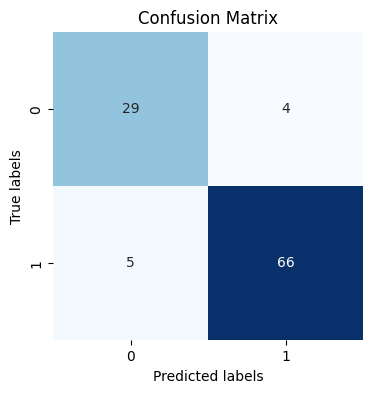

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

#Train the Gradient Boosting classifier

#Let number of weak learners be 50
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)  

gbc_model.fit(input_train, target_train)

# Make predictions on the test set
target_pred_gbc = gbc_model.predict(input_test)

#check the accuracy, report and confusion matrix
accuracy_gbc =  accuracy_score(target_test, target_pred_gbc)
print("Accuracy:\n",accuracy_gbc)
class_report_gbc = classification_report(target_test, target_pred_gbc)
print("Class_report:\n",class_report_gbc)

# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred_gbc)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Naive Bayes

Accuracy:
 0.9134615384615384
Class_report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



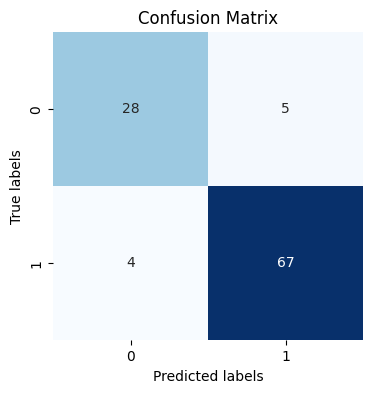

In [20]:
from sklearn.naive_bayes import GaussianNB

#Train the Naive Bayes 
nb_model = GaussianNB()  

nb_model.fit(input_train, target_train)

# Make predictions on the test set
target_pred_nb = nb_model.predict(input_test)

#check the accuracy, report and confusion matrix
accuracy_nb =  accuracy_score(target_test, target_pred_nb)
print("Accuracy:\n",accuracy_nb)
class_report_nb = classification_report(target_test, target_pred_nb)
print("Class_report:\n",class_report_nb)

# Compute confusion matrix
conf_matrix = confusion_matrix(target_test, target_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

